Analysing cleand data :

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Reading cleaned data

In [3]:
final = pd.read_csv('final1.csv')

In [4]:
final = final.dropna()
#final.drop('Outdoor parking space', axis=1, inplace=True)
final.loc[:, 'Shower rooms'] = final['Bathrooms'] + final['Shower rooms']

Number of rows and columns in cleaned dataframe with 'seaborn'

Text(0.5, 1.0, 'Number of Rows and Columns')

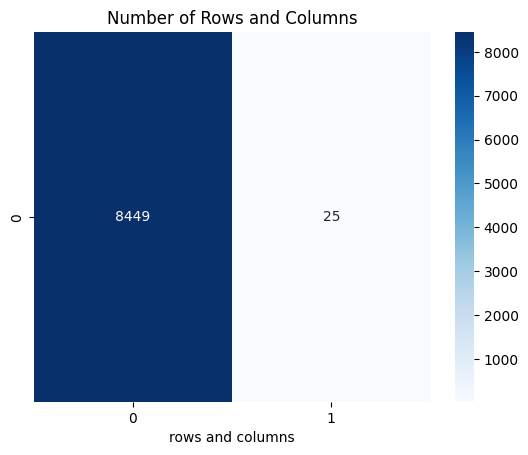

In [5]:
num_rows, num_cols = final.shape

data = [[num_rows, num_cols]]
sns.heatmap(data, annot=True, fmt="d", cmap='Blues')
plt.xlabel('rows and columns')
plt.title('Number of Rows and Columns')

The correlation between the variables and the price

<Axes: >

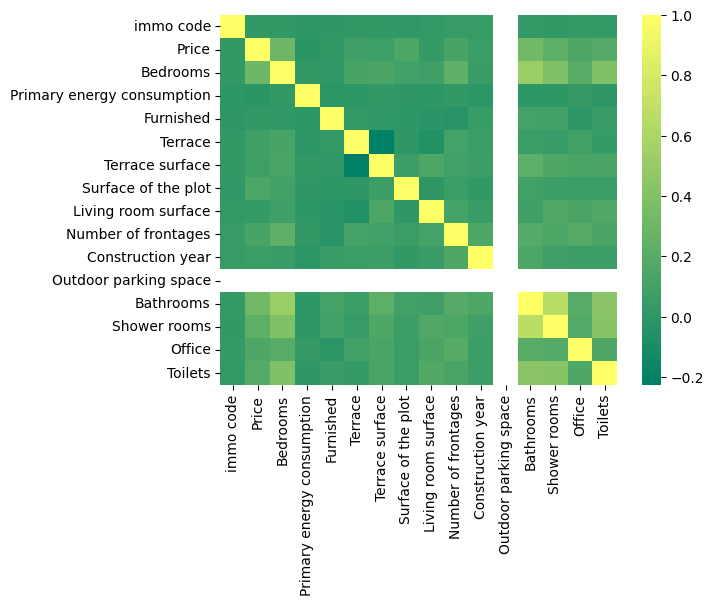

In [6]:
numeric_column = final.select_dtypes(include=['int64', 'float64'])
numeric_columns = numeric_column.corr()

sns.heatmap(numeric_columns, cmap='summer') 

from the above heatmap:
* 'Price' is most correlated with 'Shower rooms' and 'Bedrooms'
* 'Price' is least correlated with 'Primary energy consumption', 'Construction year and 'Living room surface'
* 'Bathrooms' is most correlated with 'Toilets' and  'Beddrooms' and vice versa 

Percentage of missing values per column

In [7]:
counting=final.shape[0]
for column in final.columns:
    if (final[column] == 0).any() or (final[column] == '0').any():
        count_0 = final[column].value_counts().get(0, 0)
        missing_values = (count_0 * 100) / counting
        print(column + ': ' + str(missing_values) +' %')
    else:
        print(column + ': 0')

Type of property: 0
Location: 0
postal code: 0
immo code: 0
Price: 0
Address: 0
Bedrooms: 4.82897384305835 %
Energy class: 0
Primary energy consumption: 22.452361226180614 %
Furnished: 97.46715587643509 %
Terrace: 73.9377441117292 %
Terrace surface: 65.7592614510593 %
Surface of the plot: 44.336607882589654 %
Living room surface: 56.65759261451059 %
Number of frontages: 29.885193514025328 %
Construction year: 38.54894070304178 %
Building condition: 30.18108651911469 %
Outdoor parking space: 100.0 %
Bathrooms: 14.309385726121434 %
Shower rooms: 10.865191146881287 %
Office: 86.16404308202154 %
Toilets: 27.482542312699728 %
Kitchen type: 37.152325719020006 %
Heating type: 47.76896674162623 %
province: 0


Percentage of missing values per column in heatmap

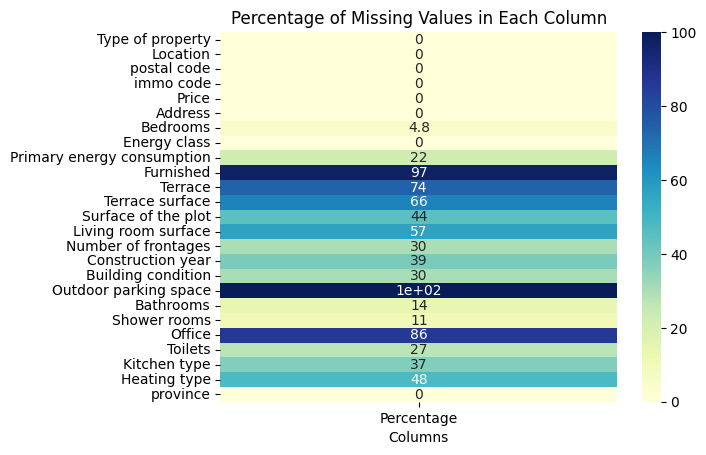

In [8]:
counting = final.shape[0]
missing_values = {}

for column in final.columns:
    if (final[column] == 0).any() or (final[column] == '0').any():
        count_0 = final[column].value_counts().get(0, 0)
        missing_values[column] = (count_0 * 100) / counting
    else:
        missing_values[column] = 0

# Convert the dictionary to a DataFrame
missing_df = pd.DataFrame.from_dict(missing_values, orient='index', columns=['Percentage'])

# Create a heatmap
sns.heatmap(missing_df, annot=True, cmap='YlGnBu')

# Customize the plot
plt.title('Percentage of Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('')

# Show the plot
plt.show()